# Task for today
## Diabetes Prediction
whether a patient has diabetes or not.

In [41]:
#importing library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [42]:
#loading the data
df=pd.read_csv('../input/pima-indians-diabetes-database/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# Data Visualization

In [43]:
#creating correlation and storing it in a variable
correlation_metrix=df.corr()

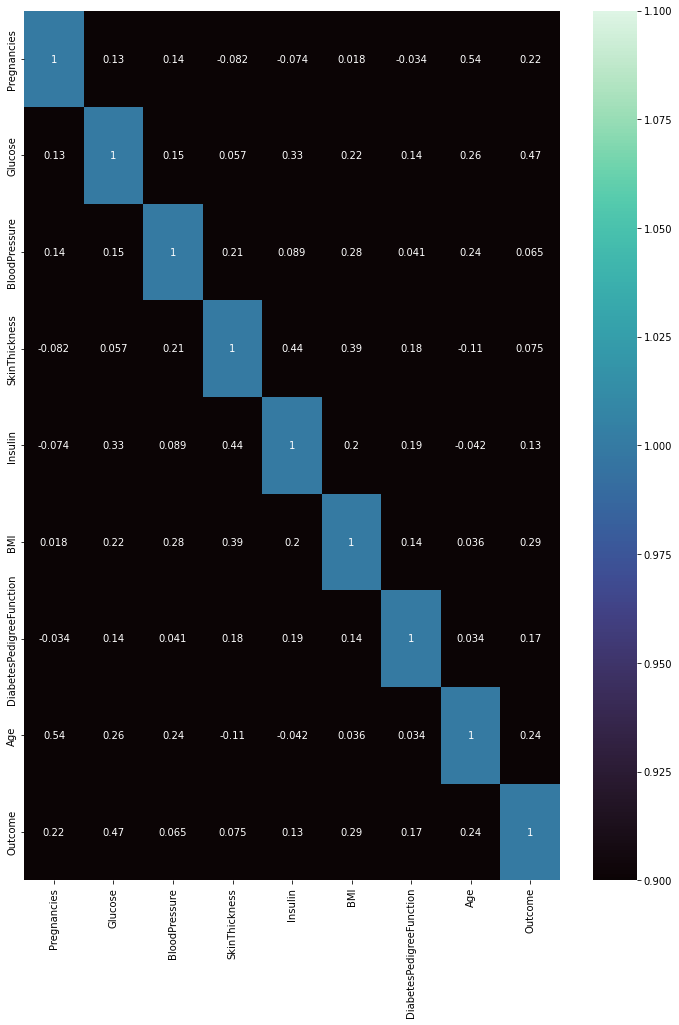

In [44]:
plt.figure(figsize=(12,16))
sns.heatmap(correlation_metrix,annot=True,vmin=1.0,vmax=1.0,cmap='mako')
plt.show()

In [45]:
#getting information about the distribution
age_ct=pd.crosstab(pd.qcut(df['Age'],q=4,labels=['Youngest','Younger','Older','Oldest']),df['Outcome'])

age_ct_avgs=age_ct[1]/(age_ct[0]+age_ct[1])

age_ct=pd.concat([age_ct,age_ct_avgs],axis=1)
age_ct.columns=['Negative','Positive','% Positive']
age_ct









,Negative,Positive,% Positive
Age,,,
Youngest,188,31,0.141553
Younger,124,53,0.299435
Older,105,95,0.475000
Oldest,83,89,0.517442


In [46]:
#scaling the feature dataset
scaler=StandardScaler()
scaled_columns=df.iloc[:,:-1]
scaled_columns=pd.DataFrame(scaler.fit_transform(scaled_columns),columns=scaled_columns.columns)

In [47]:
scaled_columns

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496
...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136
764,-0.547919,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023
765,0.342981,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.685193,-0.275760
766,-0.844885,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,-0.371101,1.170732


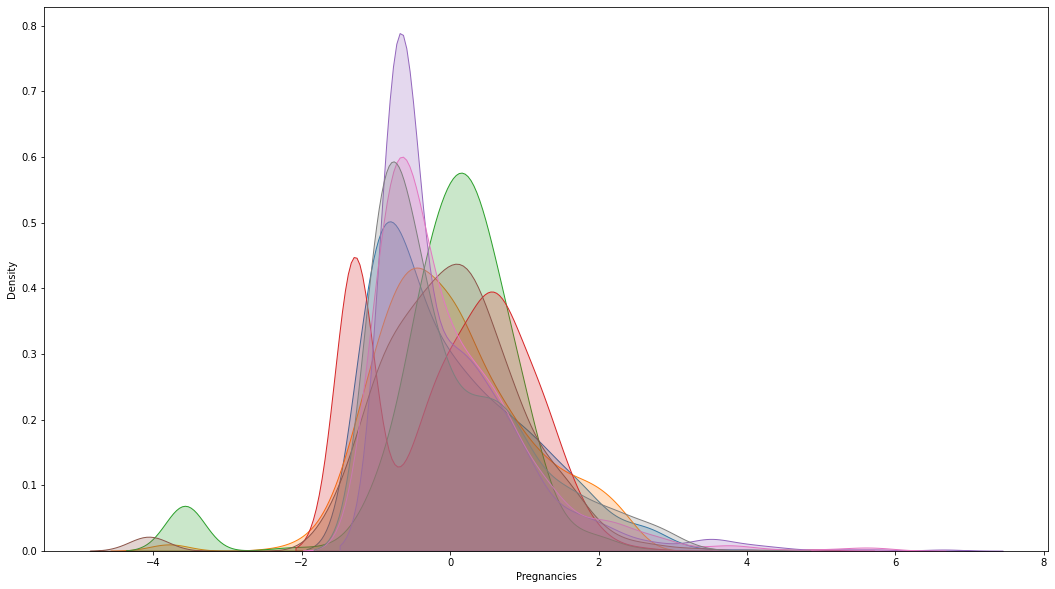

In [48]:
#kdplot 
plt.figure(figsize=(18,10))
for column in scaled_columns.columns:
    sns.kdeplot(scaled_columns[column],shade=True)
plt.show()

In [49]:
#Splitting and Scaling the data
y=df.loc[:,'Outcome']
x=df.drop('Outcome',axis=1)

In [50]:
x=scaler.fit_transform(x)

In [51]:
#splitting the data
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=1)

In [52]:
#Training and Result
log_model=LogisticRegression()
svm_model=SVC(C=1.0)
ann_model=MLPClassifier(hidden_layer_sizes=(16,16))

In [53]:
log_model.fit(x_train,y_train)
svm_model.fit(x_train,y_train)
ann_model.fit(x_train,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



MLPClassifier(hidden_layer_sizes=(16, 16))

In [54]:
#checking the result of the model
log_acc=log_model.score(x_test,y_test)
svm_acc=svm_model.score(x_test,y_test)
ann_acc=ann_model.score(x_test,y_test)

In [55]:
fig=px.bar(
    x=['Logistic Regression','Support Vector Machine','Neural Network'],
    y=[log_acc,svm_acc,ann_acc],
    color=['Logistic Regression','Support Vector Machine','Neural Network']
)
fig.show()

In [56]:
print('Logistic Regression',log_acc)
print('Support Vector Machine',svm_acc)
print('Neural Network',ann_acc)

Logistic Regression 0.7835497835497836
Support Vector Machine 0.7965367965367965
Neural Network 0.7965367965367965
